In [2]:
import os
import sys
import pandas as pd
import numpy as np
from copy import copy
import warnings
import importlib
from IPython.core.interactiveshell import InteractiveShell
# from matplotlib import rcParams

# rcParams.update({
#     "text.usetex": True,                
#     "font.family": "serif",            
#     "font.serif": ["Computer Modern"], 
#     "axes.labelsize": 20,              
#     "xtick.labelsize": 20,             
#     "ytick.labelsize": 20,             
#     "legend.fontsize": 20,            
#     "figure.titlesize": 0,             
#     "axes.titlesize": 0,              
# })
notebook_dir = os.getcwd()

project_root = os.path.abspath(os.path.join(notebook_dir, ".."))
if project_root not in sys.path:
    sys.path.append(project_root)
    
utils_path = os.path.join(project_root, "utils")
if utils_path not in sys.path:
    sys.path.append(utils_path)

    
import get_data

In [6]:
#ACCESS DATAFRAME
DATA_PATH = get_data.get_dataset_abspath()
load_path = os.path.join(DATA_PATH, "raw_combined_data.parquet")
combined_df = pd.read_parquet(load_path)


Replacement statistics (percentages):
Column: HR
  Method: linear
  Initial missing: 153399
  Linear fill: 100.00%
Column: O2Sat
  Method: linear
  Initial missing: 202736
  Linear fill: 100.00%
Column: SBP
  Method: linear
  Initial missing: 226265
  Linear fill: 100.00%
Column: MAP
  Method: linear
  Initial missing: 193270
  Linear fill: 100.00%
Column: Resp
  Method: linear
  Initial missing: 238335
  Linear fill: 100.00%
Column: Temp
  Method: cluster
  Initial missing: 1026984
  Cluster-mean fill: 100.00%
  Nearest cluster-mean fill: 0.00%
Column: DBP
  Method: cluster
  Initial missing: 486554
  Cluster-mean fill: 100.00%
  Nearest cluster-mean fill: 0.00%
Column: EtCO2
  Method: cluster
  Initial missing: 1494574
  Cluster-mean fill: 99.37%
  Nearest cluster-mean fill: 0.63%
Column: BaseExcess
  Method: cluster
  Initial missing: 1468065
  Cluster-mean fill: 99.90%
  Nearest cluster-mean fill: 0.10%
Column: HCO3
  Method: cluster
  Initial missing: 1487182
  Cluster-mean fill:

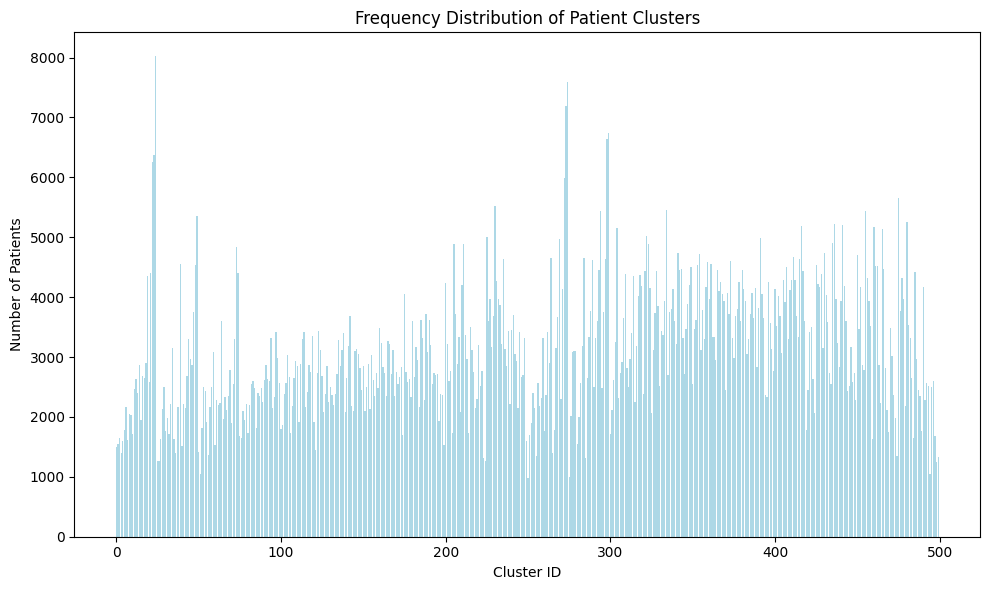

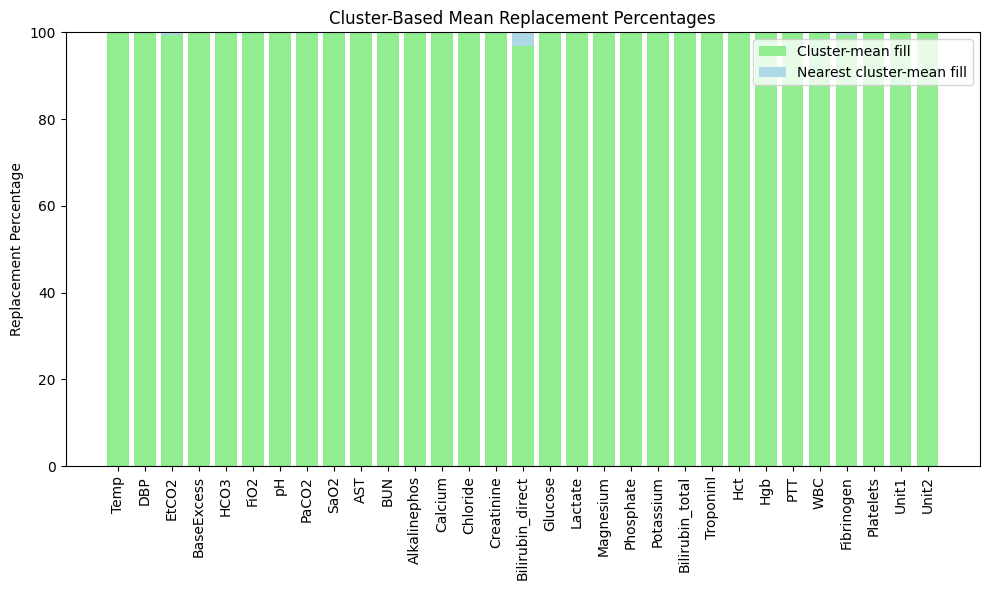

In [11]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import impute_data
importlib.reload(impute_data)

# Choose dataset mode: 1 = full, 2 = first 1000 patients
DATASET_MODE = 1
df_to_impute = (combined_df[combined_df["patient_id"] <= 500].copy() 
                if DATASET_MODE == 2 else combined_df.copy())

# Perform imputation with chosen binning options
df_imputed, replacement_stats = impute_data.impute_df_no_nans(
    df_to_impute,
    nan_density=0.3,   # <-- You can keep or adjust these parameters

    gender_bins=2,
    age_bins=10,
    hr_bins=5,
    map_bins=5,
)


impute_data.print_replacement_stats(replacement_stats)
impute_data.plot_cluster_distribution(df_imputed)
impute_data.plot_cluster_fill(replacement_stats)


In [12]:
# Check: Number of NaNs for each feature in the imputed dataset
nan_counts = df_imputed.isna().sum()
print("Number of NaNs for each feature:")
for feature, count in nan_counts.items():
    print(f"{feature}: {count}")


Number of NaNs for each feature:
HR: 0
O2Sat: 0
Temp: 0
SBP: 0
MAP: 0
DBP: 0
Resp: 0
EtCO2: 0
BaseExcess: 0
HCO3: 0
FiO2: 0
pH: 0
PaCO2: 0
SaO2: 0
AST: 0
BUN: 0
Alkalinephos: 0
Calcium: 0
Chloride: 0
Creatinine: 0
Bilirubin_direct: 0
Glucose: 0
Lactate: 0
Magnesium: 0
Phosphate: 0
Potassium: 0
Bilirubin_total: 0
TroponinI: 0
Hct: 0
Hgb: 0
PTT: 0
WBC: 0
Fibrinogen: 0
Platelets: 0
Age: 0
Gender: 0
Unit1: 0
Unit2: 0
HospAdmTime: 8
ICULOS: 0
SepsisLabel: 0
patient_id: 0
dataset: 0
cluster_id: 0


In [13]:
#SAVE DATAFRAME
DATA_PATH = get_data.get_dataset_abspath()
save_path = os.path.join(DATA_PATH, "Fully_imputed_dataset.parquet")
df_imputed.to_parquet(save_path, compression="snappy")

In [ ]:
#Check saved dataframe has full imputation

DATA_PATH = get_data.get_dataset_abspath()
load_path = os.path.join(DATA_PATH, "Fully_imputed_dataset.parquet")
df = pd.read_parquet(load_path)

nan_counts = df.isna().sum()
print("Number of NaNs for each column in the fully imputed dataset:")
for column, count in nan_counts.items():
    print(f"{column}: {count}")


Number of NaNs for each column in the fully imputed dataset:
HR: 0
O2Sat: 0
Temp: 0
SBP: 0
MAP: 0
DBP: 0
Resp: 0
EtCO2: 0
BaseExcess: 0
HCO3: 0
FiO2: 0
pH: 0
PaCO2: 0
SaO2: 0
AST: 0
BUN: 0
Alkalinephos: 0
Calcium: 0
Chloride: 0
Creatinine: 0
Bilirubin_direct: 0
Glucose: 0
Lactate: 0
Magnesium: 0
Phosphate: 0
Potassium: 0
Bilirubin_total: 0
TroponinI: 0
Hct: 0
Hgb: 0
PTT: 0
WBC: 0
Fibrinogen: 0
Platelets: 0
Age: 0
Gender: 0
Unit1: 0
Unit2: 0
HospAdmTime: 8
ICULOS: 0
SepsisLabel: 0
patient_id: 0
dataset: 0
cluster_id: 0
